# Scenario with random traffic - No improvement

In [1]:
import sys  
sys.path.insert(0, 'src/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulate_interactive import simulate_interactive
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Plot function used for the visualizations

In [2]:
def plot(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(0,120)
    plt.ylim(-40,40)

### Simulations (It will take some time)

Reading file: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_17_T/DEU_Ffb-1_7_I-1-1.cr.xml  Outputing to folder: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_17_T
 Retrying in 1 seconds
Loading configuration ... done.
***Starting server on port 52411 ***
Loading net-file from 'scenarios_sumo/scenario_17_T/DEU_Ffb-1_7_I-1-1.net.xml' ... done (36ms).
Loading additional-files from 'scenarios_sumo/scenario_17_T/DEU_Ffb-1_7_I-1-1.add.xml' ... done (0ms).
Loading done.
Simulation version 1.10.0 started with time: 0.00


Reached goal at time step:  221
Simulation ended at time: 22.50
Reason: TraCI requested termination.
Performance: 
 Duration: 5166.97s
 TraCI-Duration: 5166.93s
 Real time factor: 0.00435459
 UPS: 0.211536
Vehicles: 
 Inserted: 5
 Running: 4
 Waiting: 0
Emergency Stops: 3

Done simulating
Reading file: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_17_NT/DEU_Ffb-1_7_I-1-1.cr.xml  Outputing to folder: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_17_NT
 Retrying in 1 seconds
Loading configuration ... done.
***Starting server on port 55221 ***
Loading net-file from 'scenarios_sumo/scenario_17_NT/DEU_Ffb-1_7_I-1-1.net.xml' ... done (136ms).
Loading additional-files from 'scenarios_sumo/scenario_17_NT/DEU_Ffb-1_7_I-1-1.add.xml' ... done (0ms).
Loading done.
Simulation version 1.10.0 started with time: 0.00


Reached goal at time step:  221
Simulation ended at time: 22.50
Reason: TraCI requested termination.
Performance: 
 Duration: 3592.91s
 TraCI-Duration: 3592.88s
 Real time factor: 0.00626234
 UPS: 0.304210
Vehicles: 
 Inserted: 5
 Running: 4
 Waiting: 0
Emergency Stops: 3

Done simulating


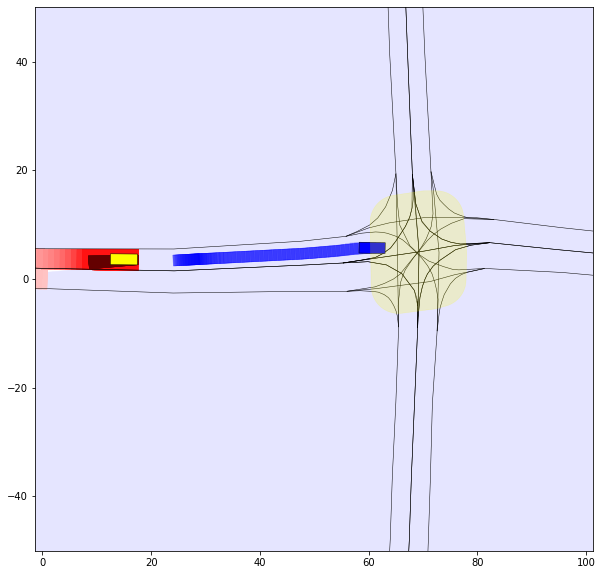

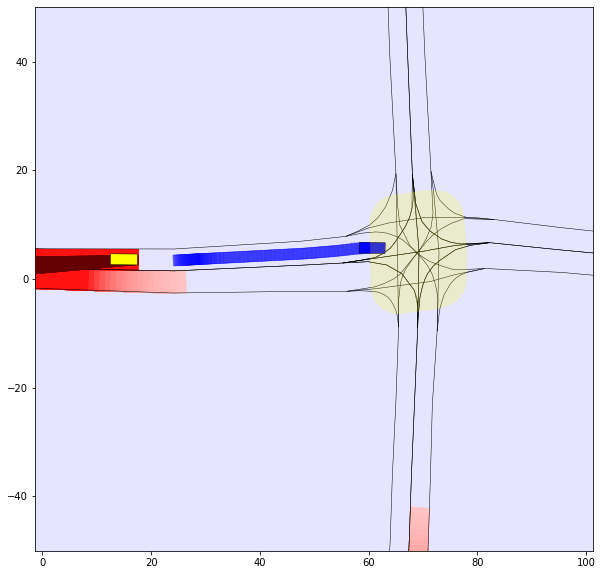

In [3]:
track_vehicle, tracked_scenarios, tracked_views = simulate_interactive('scenarios_sumo/scenario_17_T');
no_track_vehicle, not_tracked_scenarios, not_tracked_views = simulate_interactive('scenarios_sumo/scenario_17_NT');

### Plots (Same as Figure 10 in the paper)

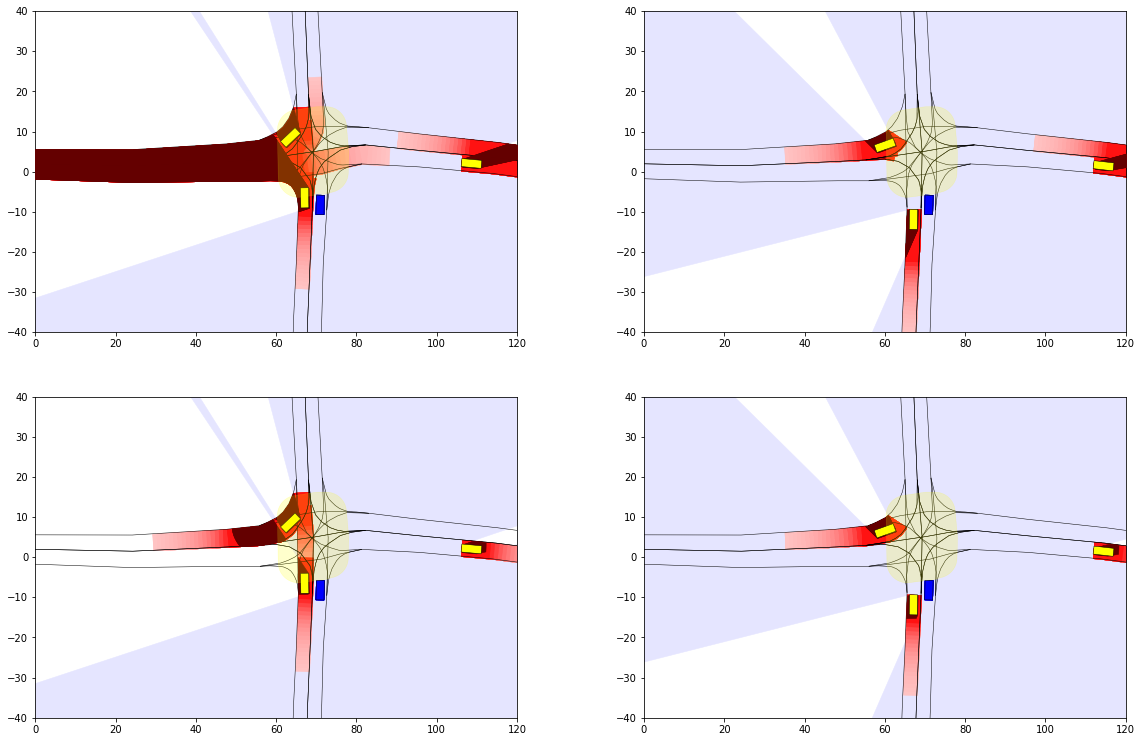

In [4]:
t1 = 168
t2 = 174
fig, ax = plt.subplots(2, 2, figsize=(20,13))
plt.sca(ax[0][0])
plot(t1, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[0][1])
plot(t2, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[1][0])
plot(t1, track_vehicle, tracked_scenarios, tracked_views)
plt.sca(ax[1][1])
plot(t2, track_vehicle, tracked_scenarios, tracked_views)

### Animation of the baseline method

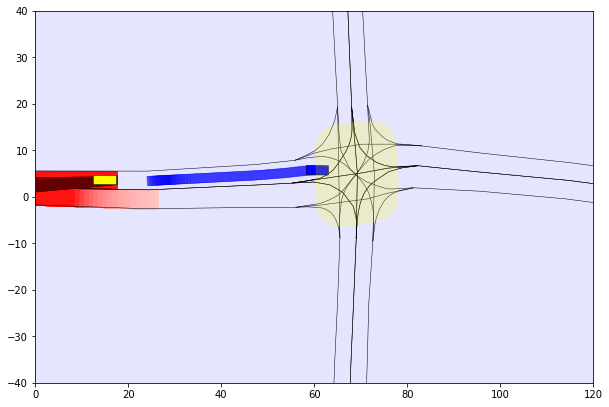

In [5]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[no_track_vehicle, not_tracked_scenarios, not_tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Animation of the proposed method

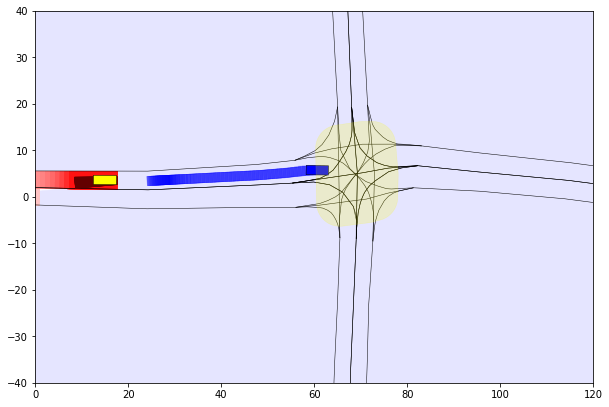

In [6]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[track_vehicle, tracked_scenarios, tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())